In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:\\sem_3\\retail analytics\\files\\train.csv")
df

# In the training data set we have the loyalty score as target and we will train the model on it
#C : Collect data, data is given, factor analysis already is done
#O
#Target variable is divided in 3 parts : Positive, negative, Neutral

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08,C_ID_bf62c0b49d,2,2,0,0.300062


In [4]:
# Understand the drivers of loyalty score = Target
# Check it's effectiveness
# Are customers loyal - Visualising the Target
# Target = y Variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [6]:
df.describe()

# Since 75% of the data is 0.76 hence we divide it for +2 and -2

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [7]:
df.shape

(201917, 6)

In [8]:
df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [9]:
len(df['card_id'].unique())

#almost 2 Lakh Credit Cards all unique

201917

In [10]:
# Out of all the target values belonging to each customer hos many are positive i.e. high loyalty
a1=df[['target']]>0
a2=a1.groupby('target').size()
a2

target
False    104308
True      97609
dtype: int64

In [11]:
(97609/201917)*100
#Almost 48% are positive values in the Target Column

48.341150076516584

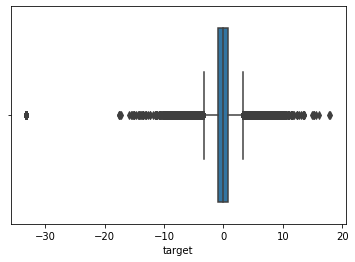

In [12]:
sns.boxplot(x=df['target'])

# since there are outliears we remove them through z score

In [14]:
from scipy import stats

In [56]:

#Removing outliers

df4 = df[(np.abs(stats.zscore(df['target']))<3)]
print(df4)

       first_active_month          card_id  feature_1  feature_2  feature_3  \
0                 2017-06  C_ID_92a2005557          5          2          1   
1                 2017-01  C_ID_3d0044924f          4          1          0   
2                 2016-08  C_ID_d639edf6cd          2          2          0   
3                 2017-09  C_ID_186d6a6901          4          3          0   
4                 2017-11  C_ID_cdbd2c0db2          1          3          0   
5                 2016-09  C_ID_0894217f2f          4          2          0   
6                 2016-12  C_ID_7e63323c00          3          2          1   
7                 2017-09  C_ID_dfa21fc124          3          2          1   
8                 2017-08  C_ID_fe0fdac8ea          2          1          0   
9                 2016-08  C_ID_bf62c0b49d          2          2          0   
10                2016-10  C_ID_92853cdb2c          5          2          1   
11                2016-03  C_ID_269d816788          

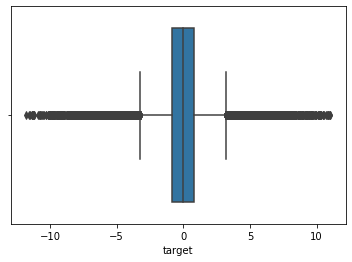

In [19]:
sns.boxplot(x=df4['target'])

In [ ]:
#shape
#df1.shape   201917
#df2.shape  196385
#df3.shape  194421
#df4.shape  193506            
# since there are no more drastic changes after 4 iterations we stop 

In [20]:
#first Active month column
df4['Today']=df4['first_active_month'].max()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df4['first_active_month']=pd.to_datetime(df4['first_active_month'])
df4['Today']=pd.to_datetime(df4['Today'])
df4

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,first_active_month,card_id,feature_1,feature_2,feature_3,target,Today
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2018-02-01
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2018-02-01
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2018-02-01
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2018-02-01
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2018-02-01
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585,2018-02-01
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129,2018-02-01
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850,2018-02-01
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406,2018-02-01
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062,2018-02-01


In [22]:
df4['card_age']= (df4['Today'] - df4['first_active_month']).dt.days

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199654 entries, 0 to 201916
Data columns (total 8 columns):
first_active_month    199654 non-null datetime64[ns]
card_id               199654 non-null object
feature_1             199654 non-null int64
feature_2             199654 non-null int64
feature_3             199654 non-null int64
target                199654 non-null float64
Today                 199654 non-null datetime64[ns]
card_age              199654 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 13.7+ MB


In [24]:
df4.groupby(['card_age'])['card_id'].count()
    # we get the age of the card 

card_age
0           1
31         34
62      10170
92      12928
123     13680
153     13839
184     13561
215     12264
245      9821
276      9063
306      8639
337      8126
365      7962
396      9428
427      9230
457      7103
488      5298
518      4336
549      4908
580      4120
610      4032
641      3272
671      2906
702      1966
731      1603
762      1675
793      2307
823      1554
854      1501
884      1478
        ...  
1372      418
1402      345
1433      236
1461      192
1492      141
1523      160
1553      130
1584      125
1614      118
1645      122
1676      108
1706       79
1737       93
1767       56
1798       55
1826       36
1857       22
1888       18
1918       47
1949       30
1979       37
2010       34
2041       28
2071       18
2102       27
2132       15
2163       10
2192        7
2254        2
2284        8
Name: card_id, Length: 75, dtype: int64

In [25]:
df4.corr()
# there is very low correlation

,feature_1,feature_2,feature_3,target,card_age
feature_1,1.000000,-0.130127,0.582947,-0.011445,0.116253
feature_2,-0.130127,1.000000,0.059940,-0.003750,0.157671
feature_3,0.582947,0.059940,1.000000,-0.007517,0.194711
target,-0.011445,-0.003750,-0.007517,1.000000,-0.005109
card_age,0.116253,0.157671,0.194711,-0.005109,1.000000


In [26]:
#simple linear regression
#Input variable
X = df4.drop(columns=['target','Today','card_id','first_active_month'],axis=1)
#Output Variable
y = df4[['target']]

In [27]:
#model building
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

reg.score(X,y)

0.00016750395605458213

In [29]:
testset=pd.read_csv("D:\\sem_3\\retail analytics\\files\\test.csv")
testset

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1
5,2017-07,C_ID_5814b4f13c,5,1,1
6,2017-10,C_ID_a1b3c75277,1,2,0
7,2017-02,C_ID_f7cada36d3,3,1,1
8,2017-07,C_ID_9d2bc8dfc4,4,3,0
9,2016-03,C_ID_6d8dba8475,5,1,1


In [30]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [31]:
testset.dropna(axis='rows',inplace=True)     # dropping null value

In [32]:
testset.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [33]:
#first Active month column

In [34]:
testset['first_active_month']=pd.to_datetime(testset['first_active_month'])

In [35]:
testset['Today']=testset['first_active_month'].max()

In [36]:
testset['Today']=pd.to_datetime(testset['Today'])

In [37]:
testset['card_age']= (testset['Today'] - testset['first_active_month']).dt.days
testset

,first_active_month,card_id,feature_1,feature_2,feature_3,Today,card_age
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,2018-01-01,275
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,2018-01-01,365
2,2017-08-01,C_ID_b709037bc5,5,1,1,2018-01-01,153
3,2017-12-01,C_ID_d27d835a9f,2,1,0,2018-01-01,31
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,2018-01-01,762
5,2017-07-01,C_ID_5814b4f13c,5,1,1,2018-01-01,184
6,2017-10-01,C_ID_a1b3c75277,1,2,0,2018-01-01,92
7,2017-02-01,C_ID_f7cada36d3,3,1,1,2018-01-01,334
8,2017-07-01,C_ID_9d2bc8dfc4,4,3,0,2018-01-01,184
9,2016-03-01,C_ID_6d8dba8475,5,1,1,2018-01-01,671


In [38]:
t1=testset.drop(columns=['Today','card_id','first_active_month'],axis=1)

In [39]:
y_pred=reg.predict(t1)
y_pred

array([[-0.04042796],
       [-0.02595039],
       [-0.05049211],
       ...,
       [-0.05635321],
       [-0.00136106],
       [-0.05582676]])

In [40]:
predf=pd.DataFrame(y_pred)
predf

,0
0,-0.040428
1,-0.025950
2,-0.050492
3,0.001850
4,-0.061179
5,-0.051036
6,0.006882
7,-0.019524
8,-0.056919
9,-0.059582


In [41]:
predf.isnull().sum()

0    0
dtype: int64

In [42]:
predf.describe()
# About 5 of the predcted data is around the vlaue -0.01498 

,0
count,123622.000000
mean,-0.030251
std,0.022037
min,-0.074612
25%,-0.050044
50%,-0.028932
75%,-0.014981
max,0.019467


In [43]:
def target_check1(x):
    if x>2:
        return 'high'
    elif x<-2:
        return 'low'
    else:
        return 'med'

In [44]:
# checking % loyalty on TRAINING DATA set

df['target1']=df['target'].apply(target_check1)

In [45]:
d1=df['target1'].value_counts()
d1

med     163531
low      20813
high     17573
Name: target1, dtype: int64

In [46]:
def target_check2(x):
    if x>0:
        return 'high'
    elif x==0:
        return 'med'
    else:
        return 'low'
    

In [47]:
# checking % loyalty on TRAINING DATA set

df['target2']=df['target'].apply(target_check2)

In [48]:
d2=df['target2'].value_counts()
d2

low     102678
high     97609
med       1630
Name: target2, dtype: int64

In [49]:
print((d1/len(df))*100)
print((d2/len(df))*100)

# A company usually has less loyal cutomers hence we pick target 1 with HIGH Loyalty of : 8% 

med     80.989218
low     10.307701
high     8.703081
Name: target1, dtype: float64
low     50.851588
high    48.341150
med      0.807262
Name: target2, dtype: float64


In [50]:
"""
A good loyalty program is one in whch we have larger middle portion and few high or loyal customers.
Hence , we go with the target 1

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-50-9ddd98054c4c>, line 3)

In [51]:
predf['target1']=predf[0].apply(target_check1)

In [52]:
d1=df['target1'].value_counts()
d1

med     163531
low      20813
high     17573
Name: target1, dtype: int64

In [53]:
def target_n(x):
    if x=='high':
        return 2
    elif x=='med':
        return 0
    else:
        return -2
    

In [54]:
predf['target_num']=predf['target1'].apply(target_n)
predf

,0,target1,target_num
0,-0.040428,med,0
1,-0.025950,med,0
2,-0.050492,med,0
3,0.001850,med,0
4,-0.061179,med,0
5,-0.051036,med,0
6,0.006882,med,0
7,-0.019524,med,0
8,-0.056919,med,0
9,-0.059582,med,0


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


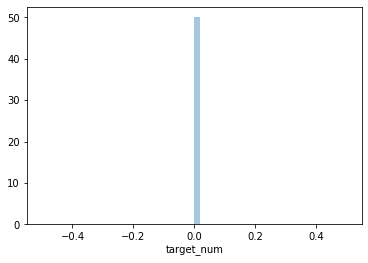

In [55]:
#Visualising the Target

sns.distplot(predf['target_num'], kde=True)

#we observe that in the training dataset most of the customer are medium and not highly loyal